<a href="https://colab.research.google.com/github/JMML2021/0401_Registre-de-logs/blob/main/Registre_de_logs_2_parte.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# importing libraries
from urllib.request import urlretrieve
import pandas as pd
import os
import re
from datetime import datetime
import pytz
#import geocoder
import folium
import time
import urllib.request
import json
import geopandas
import matplotlib.pyplot as plt
from datetime import datetime

In [2]:
!conda --version # now returns 4.8.3

conda 4.9.2


In [3]:
!pip install geopandas

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 1.0 MB 6.9 MB/s 
     |████████████████████████████████| 11.3 MB 47.7 MB/s 
     |████████████████████████████████| 6.3 MB 24.5 MB/s 
     |████████████████████████████████| 16.7 MB 8.3 MB/s 
     |████████████████████████████████| 2.0 MB 44.6 MB/s 
     |████████████████████████████████| 60 kB 7.9 MB/s 
     |████████████████████████████████| 96 kB 6.6 MB/s 
     |████████████████████████████████| 247 kB 63.1 MB/s 
     |████████████████████████████████| 15.7 MB 36.8 MB/s 
     |████████████████████████████████| 503 kB 39.4 MB/s 


In [1]:
!pip install -q condacolab
import condacolab
condacolab.install()

✨🍰✨ Everything looks OK!


In [5]:
# Activo Google Drive

from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [18]:
# Abro el fichero uan vez adecuado

path = ('/content/drive/MyDrive/01_COLAB/' +'direcionesIP.csv')
df=  pd.read_csv(path)

In [19]:
df.dtypes

Unnamed: 0        int64
virtual_host     object
IPs              object
Fecha            object
request          object
status           object
size             object
referer          object
user_agent      float64
dtype: object

In [20]:
data_ip =df["IPs"].value_counts().rename_axis('ip').reset_index(name="visits")
data_ip.head()

,ip,visits
0,66.249.76.216,415
1,127.0.0.1,21
2,157.55.33.97,7
3,199.30.20.223,6
4,157.55.35.112,4


In [21]:
df

,Unnamed: 0,virtual_host,IPs,Fecha,request,status,size,referer,user_agent
0,0,localhost,127.0.0.1,2014-02-23 03:10:31,*,200,-,Apache,NaN
1,1,localhost,127.0.0.1,2014-02-23 03:10:31,*,200,-,Apache,NaN
2,2,localhost,127.0.0.1,2014-02-23 03:10:31,*,200,-,Apache,NaN
3,3,localhost,127.0.0.1,2014-02-23 03:10:31,*,200,-,Apache,NaN
4,4,localhost,127.0.0.1,2014-02-23 03:10:31,*,200,-,Apache,NaN
...,...,...,...,...,...,...,...,...,...
495,495,www.akumenius.com,66.249.76.216,2014-02-23 03:22:21,/escapadas/culturales-pais-vasco-599.html,200,10939,Mozilla/5.0,NaN
496,496,www.akumenius.com,66.249.76.216,2014-02-23 03:22:22,/destinos-baratos/destinosEstrelles/hoteles-en...,200,8813,Mozilla/5.0,NaN
497,497,www.akumenius.com,66.249.76.216,2014-02-23 03:22:23,/hoteles-baratos/ofertas-hotel-Dorint-Am-Nurbu...,404,3100,Mozilla/5.0,NaN
498,498,www.akumenius.com,66.249.76.216,2014-02-23 03:22:25,/hoteles-baratos/ofertas-hotel-Blue-Jack-Tar-e...,404,3100,Mozilla/5.0,NaN


In [48]:
import geocoder
ip = geocoder.ip("157.55.35.112")
print(ip.city)
print(ip)
print(ip.latlng)

Redmond
<[OK] Ipinfo - Geocode [Redmond, Washington, US]>
[47.674, -122.1215]


In [53]:
for p,q in enumerate(data_ip):
  print(p,q)
  #location = q.latlng

  map = folium.Map(location=location, zoom_start=5)
  folium.CircleMarker(location=location, radius=50, color="red").add_to(map)
  folium.Marker(location).add_to(map)

#map
#print(ip)

0 ip
1 visits


In [27]:
import geopandas

path_to_data = geopandas.datasets.get_path("nybb")
gdf = geopandas.read_file(path_to_data)

gdf

,BoroCode,BoroName,Shape_Leng,Shape_Area,geometry
0,5,Staten Island,330470.010332,1.623820e+09,"MULTIPOLYGON (((970217.022 145643.332, 970227...."
1,4,Queens,896344.047763,3.045213e+09,"MULTIPOLYGON (((1029606.077 156073.814, 102957..."
2,3,Brooklyn,741080.523166,1.937479e+09,"MULTIPOLYGON (((1021176.479 151374.797, 102100..."
3,1,Manhattan,359299.096471,6.364715e+08,"MULTIPOLYGON (((981219.056 188655.316, 980940...."
4,2,Bronx,464392.991824,1.186925e+09,"MULTIPOLYGON (((1012821.806 229228.265, 101278..."


In [1]:
#!pip install geoplot

In [7]:
import geopandas
import geoplot
import mapclassify

world = geopandas.read_file(
    geopandas.datasets.get_path('naturalearth_lowres')
)
boroughs = geopandas.read_file(
    geoplot.datasets.get_path('nyc_boroughs')
)
collisions = geopandas.read_file(
    geoplot.datasets.get_path('nyc_injurious_collisions')
)

/usr/local/lib/python3.7/site-packages/geoplot/geoplot.py:885: ShapelyDeprecationWarning: Iteration over multi-part geometries is deprecated and will be removed in Shapely 2.0. Use the `geoms` property to access the constituent parts of a multi-part geometry.
  for subgeom in geom:


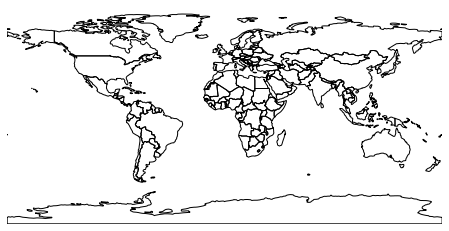

In [8]:
geoplot.polyplot(world, figsize=(8, 4))

In [5]:
# use the Orthographic map projection (e.g. a world globe)
ax = geoplot.polyplot(
    world, projection=geoplot.crs.Orthographic(), figsize=(8, 4)
)
ax.outline_patch.set_visible(True)

NameError: ignored

In [4]:
import mapclassify
gpd_per_person = world['gdp_md_est'] / world['pop_est']
scheme = mapclassify.Quantiles(gpd_per_person, k=5)

# Note: this code sample requires geoplot>=0.4.0.
geoplot.choropleth(
    world, hue=gpd_per_person, scheme=scheme,
    cmap='Greens', figsize=(8, 4)
)

NameError: ignored

In [ ]:
ax = geoplot.kdeplot(
    collisions.head(1000), clip=boroughs.geometry,
    shade=True, cmap='Reds',
    projection=geoplot.crs.AlbersEqualArea())
geoplot.polyplot(boroughs, ax=ax, zorder=1)

Geometry must be a Point or LineString


In [2]:
#!pip uninstall shapely
!pip install shapely --no-binary shapely#

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Using cached Shapely-1.8.2-cp37-cp37m-manylinux_2_12_x86_64.manylinux2010_x86_64.whl (2.0 MB)


In [ ]:
import geopandas as gpd
import geoplot as gplt
import geoplot.crs as gcrs
import matplotlib.pyplot as plt

nyc_boroughs = gpd.read_file(gplt.datasets.get_path('nyc_boroughs'))
nyc_collision_factors = gpd.read_file(gplt.datasets.get_path('nyc_collision_factors'))


proj = gcrs.AlbersEqualArea(central_latitude=40.7128, central_longitude=-74.0059)
fig = plt.figure(figsize=(10, 5))
ax1 = plt.subplot(121, projection=proj)
ax2 = plt.subplot(122, projection=proj)

gplt.kdeplot(
    nyc_collision_factors[
        nyc_collision_factors['CONTRIBUTING FACTOR VEHICLE 1'] == "Failure to Yield Right-of-Way"
    ],
    cmap='Reds',
    projection=proj,
    shade=True, thresh=0.05,
    clip=nyc_boroughs.geometry,
    ax=ax1
)
gplt.polyplot(nyc_boroughs, zorder=1, ax=ax1)
ax1.set_title("Failure to Yield Right-of-Way Crashes, 2016")

gplt.kdeplot(
    nyc_collision_factors[
        nyc_collision_factors['CONTRIBUTING FACTOR VEHICLE 1'] == "Lost Consciousness"
    ],
    cmap='Reds',
    projection=proj,
    shade=True, thresh=0.05,
    clip=nyc_boroughs.geometry,
    ax=ax2
)
gplt.polyplot(nyc_boroughs, zorder=1, ax=ax2)
ax2.set_title("Loss of Consciousness Crashes, 2016")